In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import math
import time
from multiprocessing import Pool

In [3]:
clus =  pd.read_csv("/Users/innocent/data/clusterShapeTk.csv", delimiter=" ", dtype='float32')
clus['l2'] = np.nan_to_num(clus['l2'])

In [4]:
clus['simSX'] = np.where(clus['sy']>1, clus['simSX'], np.abs(clus['simSX']) )

In [5]:
print clus.index
print clus.columns
print clus.size
print clus.describe()
print clus.head()
print clus['l2']

RangeIndex(start=0, stop=1235588, step=1)
Index([u'isBarrel', u'layer', u'simX', u'simY', u'simSX', u'simSY', u'recX',
       u'recY', u'tkSX', u'tkSY', u'x', u'y', u'xx', u'yy', u'xy', u'dx',
       u'dy', u'l2', u'sx', u'sy', u's', u'q'],
      dtype='object')
27182936
           isBarrel         layer          simX          simY         simSX  \
count  1.235588e+06  1.235588e+06  1.235588e+06  1.235588e+06  1.235588e+06   
mean   5.927324e-01  2.044860e+00 -3.095315e-03 -1.198859e-01  1.169644e-01   
std    4.913256e-01  9.942019e-01  4.602368e-01  1.836610e+00  7.543795e-01   
min    0.000000e+00  1.000000e+00 -8.043710e-01 -3.208480e+00 -1.188350e+01   
25%    0.000000e+00  1.000000e+00 -4.041070e-01 -1.736880e+00 -4.335475e-01   
50%    1.000000e+00  2.000000e+00 -2.814380e-02 -2.027025e-01  1.438415e-01   
75%    1.000000e+00  3.000000e+00  3.989352e-01  1.410442e+00  8.170855e-01   
max    1.000000e+00  4.000000e+00  7.990220e-01  3.207670e+00  1.142500e+01   

              si

In [6]:
print np.min(clus['l2']), np.max(clus['l2'])
#for c in np.nditer(clus) :
#    if abs(c['l2'])>10 : print c
#    if c['isBarrel']==0 and (c['dx']-c['simSX'])>2. :
#        print c

0.0 1.99899


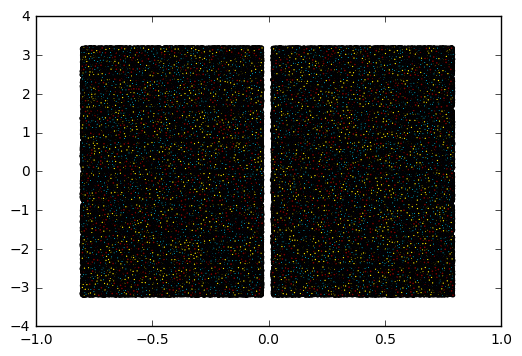

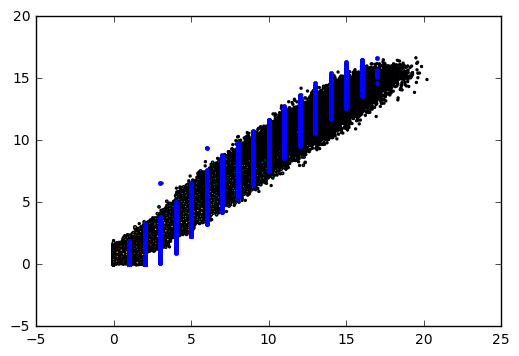

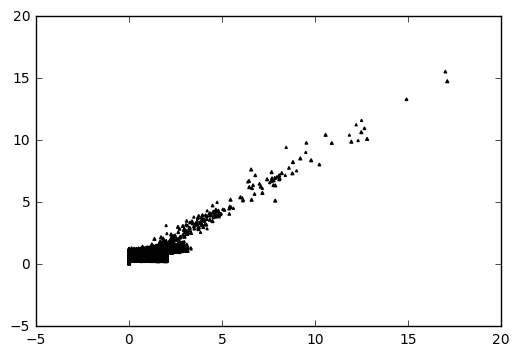

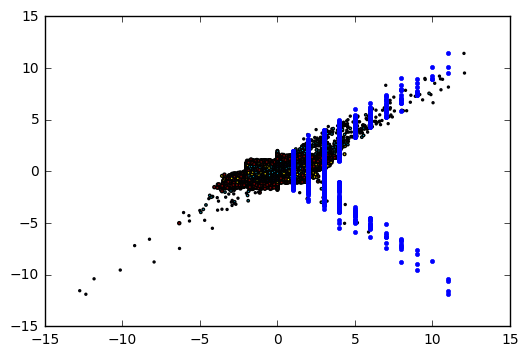

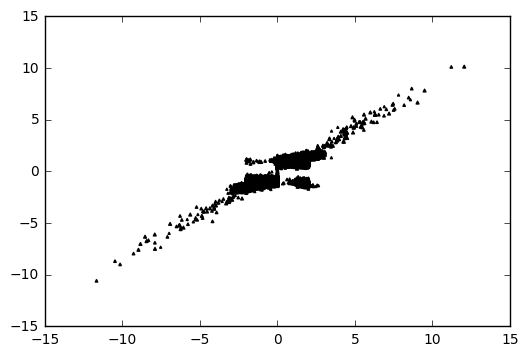

In [7]:
lb = np.ma.masked_where(clus['isBarrel']==0,clus['layer']+1)
le = np.ma.masked_where(clus['isBarrel']==1,clus['layer']+1)
# nn = np.ma.masked_where(np.logical_or(clus['simSY']<5,clus['dy']<clus['simSY']),clus['layer']+1)
plt.scatter(clus['simX'],clus['simY'],s=lb,marker='o',c=clus['layer'])
plt.show()
plt.scatter(clus['dy'],clus['simSY'],s=lb,marker='o',c=clus['layer'])
#plt.scatter(clus['dy'],clus['simSY'],s=lb,marker='o',c='blue')
plt.plot(clus['sy'],clus['simSY'],'.')
plt.show()
plt.scatter(clus['dy'],clus['simSY'],s=le,marker='^',c=clus['layer'])
plt.show()

plt.scatter(clus['dx'],clus['simSX'],s=lb,marker='o',c=clus['layer'])
plt.plot(clus['sx'],clus['simSX'],'.')
plt.show()
plt.scatter(clus['dx'],clus['simSX'],s=le,marker='^',c=clus['layer'])
plt.show()


In [15]:
def hist(w) :
    nbins = 100
    yt,xyt = np.histogram(clus['tkSY']-clus['simSY'],np.linspace(-4.,4.,nbins),weights=w, density=True)
    xyt.resize(len(yt))
    xt,xxt = np.histogram(clus['tkSX']-clus['simSX'],np.linspace(-4.,4.,nbins),weights=w, density=True)
    xxt.resize(len(xt))

    
    y1,xy = np.histogram(clus['sy']-clus['simSY'],np.linspace(-4.,4.,nbins),weights=w, density=True)
    y2,xy = np.histogram(clus['dy']-clus['simSY'],np.linspace(-4.,4.,nbins),weights=w, density=True)
    xy.resize(len(y2))
    x1,xx = np.histogram(abs(clus['sx']-1)-abs(clus['simSX']),np.linspace(-4.,4.,nbins),weights=w, density=True)
    x2,xx = np.histogram(abs(clus['dx'])-abs(clus['simSX']),np.linspace(-4.,4.,nbins),weights=w, density=True)
    x3,xx = np.histogram(clus['dx']-clus['simSX'],np.linspace(-4.,4.,nbins),weights=w*np.greater(clus['sy'],1), density=True)
    xx.resize(len(x2))
    l = np.sqrt(clus['dy']*clus['dy']+clus['dx']*clus['dx'])
    sl = np.sqrt(clus['simSY']*clus['simSY']+clus['simSX']*clus['simSX'])
    ly,lx =  np.histogram(l-sl,np.linspace(-4.,4.,nbins),weights=w, density=True)
    lx.resize(len(ly))
    l2y,l2x =  np.histogram(clus['l2'],np.linspace(0.,4.,nbins),weights=w, density=True)
    l2x.resize(len(l2y))
    ay,ax = np.histogram(clus['sx']*clus['sy'],np.linspace(0.,40.,nbins),weights=w, density=True)
    ax.resize(len(ay))
    
    return xyt,yt,xxt,xt,xy,y1,y2,xx,x1,x2,x3,lx,ly,l2x,l2y,ax,ay

In [16]:
nbins = 100
isS2 = np.equal(clus['sx'],2)*np.greater(clus['x'],0.5)
isl1 = np.equal(clus['layer'],1)
notl1 = np.logical_not(isl1)
notS1 = np.greater(clus['s'],1)
ok = np.less(clus['l2'],10.)
xyt,yt,xxt,xt,xy,y1,y2,xx,x1,x2,x3,lx,ly,l2x,l2y,ax,ay = hist((clus['isBarrel']*notS1*ok)) # *isl1)
exyt,eyt,exxt,ext,exy,ey1,ey2,exx,ex1,ex2,ex3,elx,ely,el2x,el2y,eax,eay = hist((1-clus['isBarrel'])*notS1*ok) # *isl1)

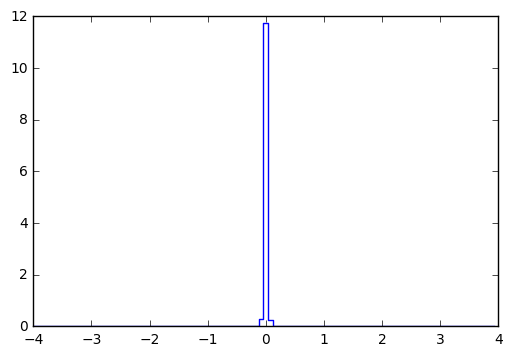

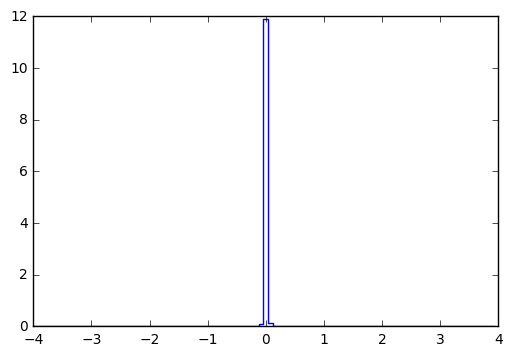

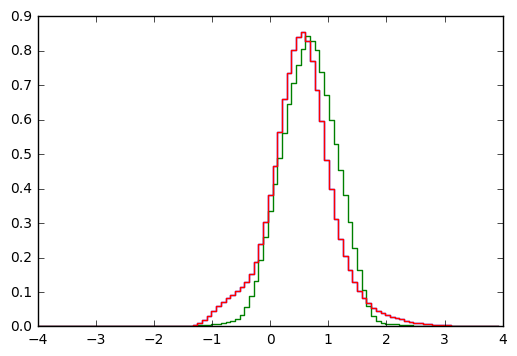

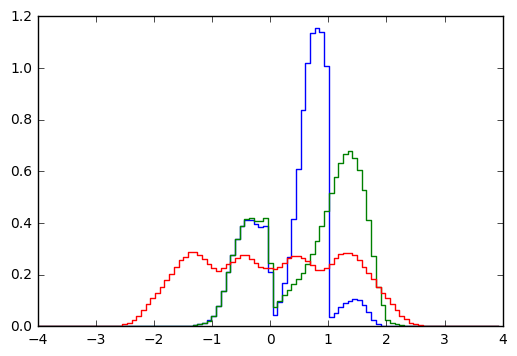

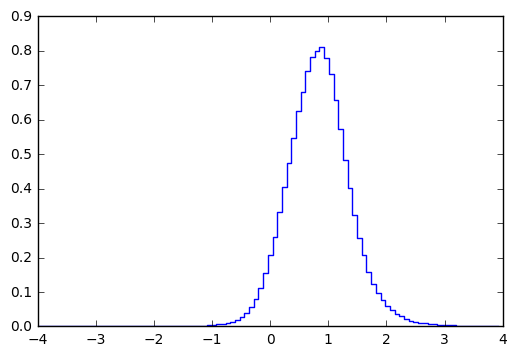

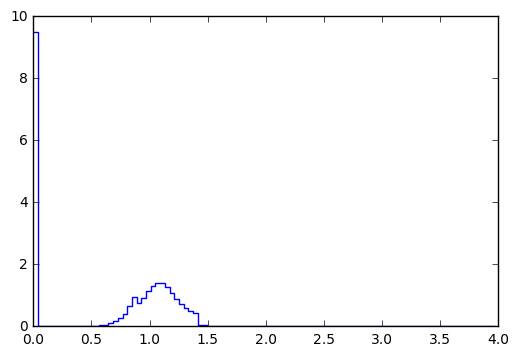

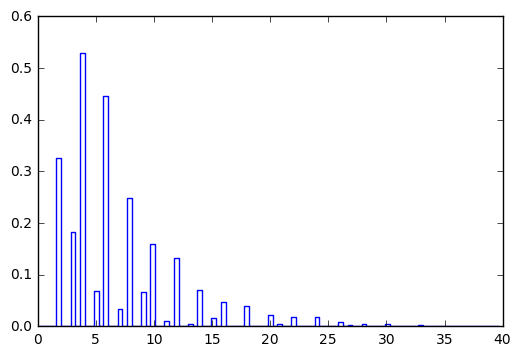

In [17]:
plt.step(xyt,yt,where='post')
plt.show()
plt.step(xxt,xt,where='post')
plt.show()

plt.step(xy,y2,where='post')
plt.step(xy,y1,where='post')
plt.step(xy,y2,where='post')
plt.show()
plt.step(xx,x1,where='post')
plt.step(xx,x2,where='post')
plt.step(xx,x3,where='post')
plt.show()
plt.step(lx,ly,where='post')
plt.show()
plt.step(l2x,l2y,where='post')
plt.show()
plt.step(ax,ay,where='post')
plt.show()



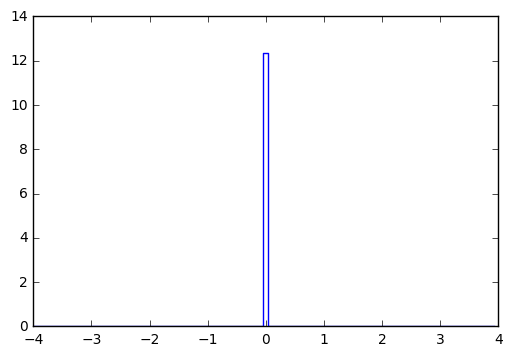

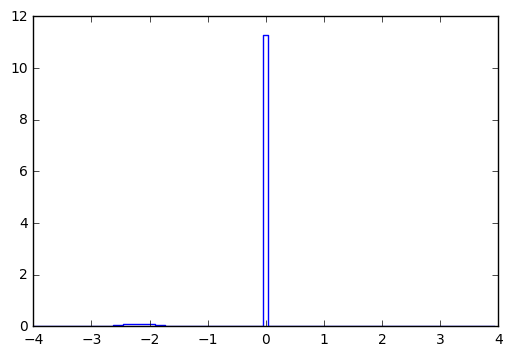

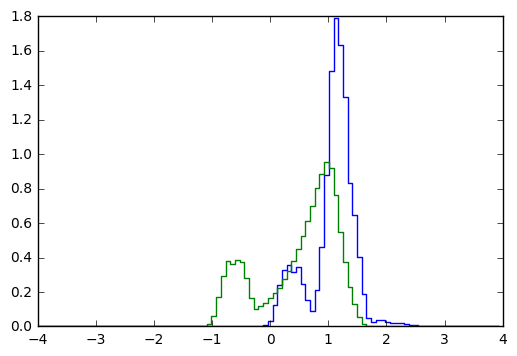

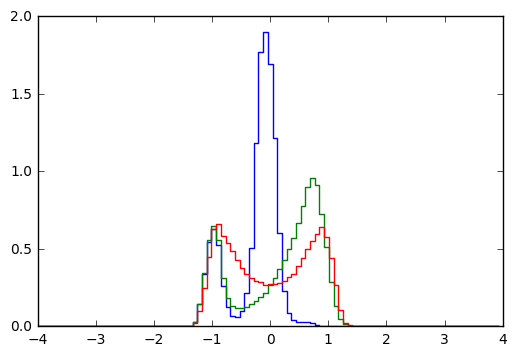

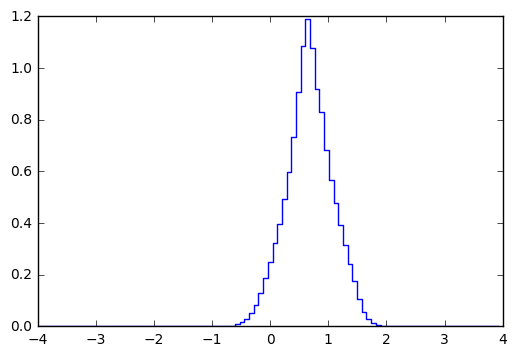

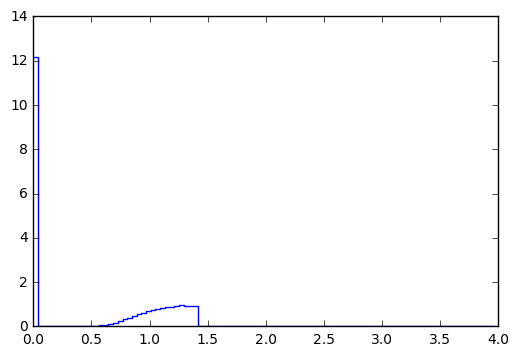

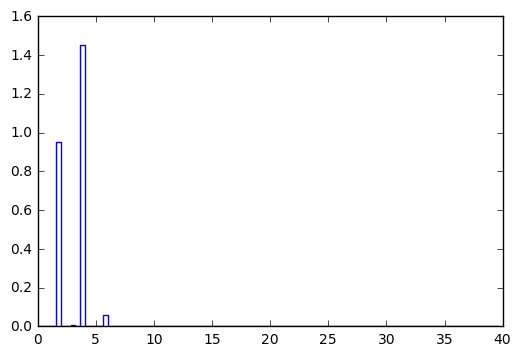

In [18]:
plt.step(exyt,eyt,where='post')
plt.show()
plt.step(exxt,ext,where='post')
plt.show()

plt.step(exy,ey1,where='post')
plt.step(exy,ey2,where='post')
plt.show()
plt.step(exx,ex1,where='post')
plt.step(exx,ex2,where='post')
plt.step(exx,ex3,where='post')
plt.show()
plt.step(elx,ely,where='post')
plt.show()
plt.step(el2x,el2y,where='post')
plt.show()
plt.step(eax,eay,where='post')
plt.show()

